## Q1

Character frequency percentages:
Character e: 11.53%
Character a: 8.65%
Character h: 8.54%
Character t: 8.20%
Character s: 7.43%
Character n: 6.98%
Character o: 6.98%
Character i: 6.21%
Character d: 5.21%
Character r: 4.88%
Character f: 4.21%
Character l: 3.55%
Character w: 3.10%
Character c: 2.44%
Character y: 2.11%
Character m: 1.77%
Character u: 1.66%
Character k: 1.44%
Character g: 1.22%
Character p: 1.22%
Character b: 1.11%
Character T: 0.55%
Character I: 0.22%
Character B: 0.22%
Character v: 0.22%
Character H: 0.11%
Character G: 0.11%
Character S: 0.11%


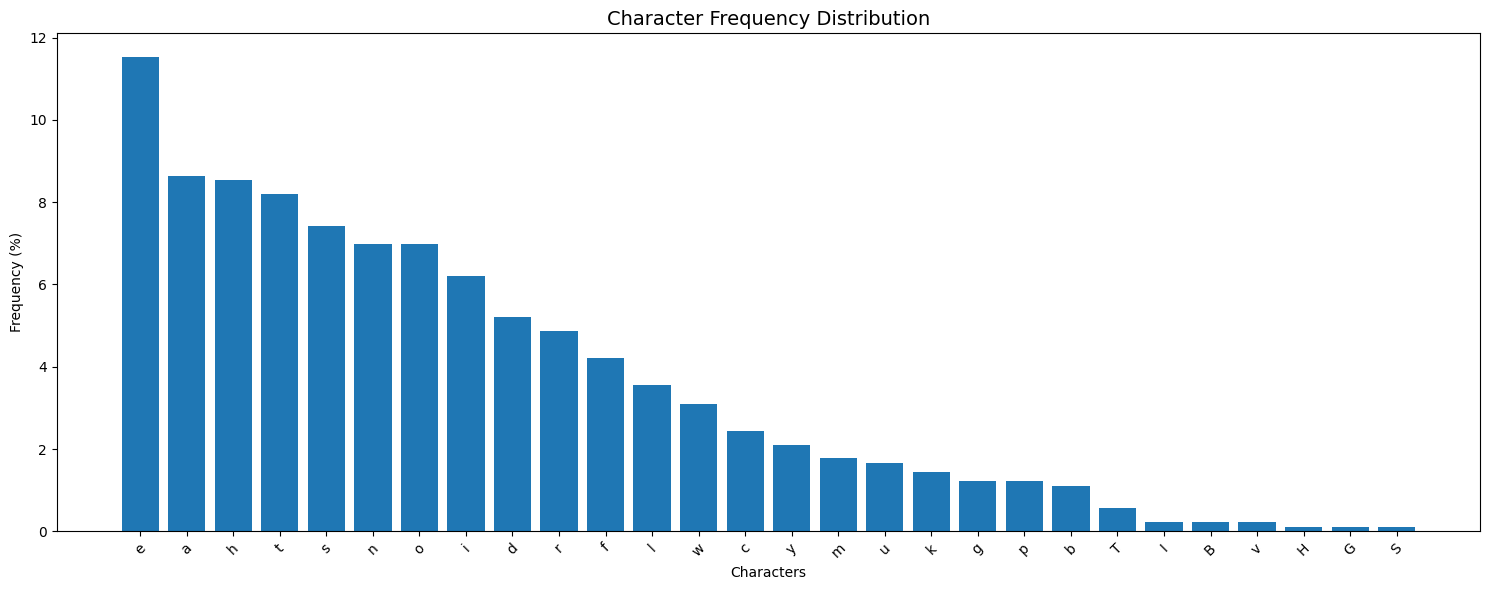

In [2]:
# Import required libraries
import matplotlib.pyplot as plt
from collections import Counter

# Sample text - The Old Man and the Sea excerpt
sample_text = """
He was an old man who fished alone in a skiff in the Gulf Stream and he had gone eighty-four days now without taking a fish. In the first forty days a boy had been with him. But after forty days without a fish the boy's parents had told him that the old man was now definitely and finally salao, which is the worst form of unlucky, and the boy had gone at their orders in another boat which caught three good fish the first week. It made the boy sad to see the old man come in each day with his skiff empty and he always went down to help him carry either the coiled lines or the gaff and harpoon and the sail that was furled around the mast. The sail was patched with flour sacks and, furled, it looked like the flag of permanent defeat.

The old man was thin and gaunt with deep wrinkles in the back of his neck. The brown spots of the benevolent skin cancer the sun brings from its reflection on the tropic sea were on his cheeks. The spots ran well down the sides of his face and his hands had the deep-creased scars from handling heavy fish on the cords. But none of these scars were fresh. They were as old as erosions in a fishless desert.
"""

# Save text to file
with open('input_text.txt', 'w', encoding='utf-8') as f:
    f.write(sample_text)

# Read text from file
with open('input_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Keep only alphabetic characters
text = ''.join(c for c in text if c.isalpha())

# Count character frequencies
char_count = Counter(text)
total_chars = len(text)

# Calculate percentages
percentages = {char: (count / total_chars) * 100 for char, count in char_count.items()}

# Sort by percentage in descending order
sorted_percentages = dict(sorted(percentages.items(), key=lambda x: x[1], reverse=True))

# Print results
print("Character frequency percentages:")
for char, percentage in sorted_percentages.items():
    print(f"Character {char}: {percentage:.2f}%")

# Create bar chart
plt.figure(figsize=(15, 6))
chars = list(sorted_percentages.keys())
percentages_values = list(sorted_percentages.values())

plt.bar(chars, percentages_values)
plt.title('Character Frequency Distribution', fontsize=14)
plt.xlabel('Characters')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q2

In [3]:
def shift_cipher(text, key, mode='encrypt'):
    result = ''

    # If decrypting, reverse the key
    if mode == 'decrypt':
        key = -key

    for char in text:
        # Only shift English letters
        if char.isalpha():
            # Get ASCII offset based on case
            ascii_offset = ord('A') if char.isupper() else ord('a')
            # Calculate new position after shift
            new_pos = (ord(char) - ascii_offset + key) % 26
            # Convert back to character
            char = chr(new_pos + ascii_offset)
        result += char

    return result

# Get input from user
text = input("Enter your text: ")
key = int(input("Enter shift key (1-25): "))

# Encrypt
encrypted = shift_cipher(text, key, 'encrypt')
print(f"Encrypted text: {encrypted}")

# Decrypt
decrypted = shift_cipher(encrypted, key, 'decrypt')
print(f"Decrypted text: {decrypted}")

Enter your text: Cryptography session
Enter shift key (1-25): 3
Encrypted text: Fubswrjudskb vhvvlrq
Decrypted text: Cryptography session


## Q3

In [6]:
def encrypt(text, key):
    # Define encryption characters for each letter
    mapping = {
        'a': '@', 'b': '#', 'c': '$', 'd': '%', 'e': '^',
        'f': '&', 'g': '*', 'h': '(', 'i': ')', 'j': '-',
        'k': '+', 'l': '=', 'm': '[', 'n': ']', 'o': '{',
        'p': '}', 'q': '|', 'r': '\\', 's': '<', 't': '>',
        'u': '?', 'v': '/', 'w': '~', 'x': '`', 'y': '!',
        'z': '#'
    }

    # Check for valid key
    if key not in mapping.values():
        return "Invalid key"

    encrypted = ""
    for char in text.lower():
        if char in mapping:
            # Encrypt using the key
            encrypted += key + mapping[char]
        else:
            encrypted += char

    return encrypted

def decrypt(encrypted_text, key):
    # Define reverse mapping for decryption
    reverse_mapping = {
        '@': 'a', '#': 'b', '$': 'c', '%': 'd', '^': 'e',
        '&': 'f', '*': 'g', '(': 'h', ')': 'i', '-': 'j',
        '+': 'k', '=': 'l', '[': 'm', ']': 'n', '{': 'o',
        '}': 'p', '|': 'q', '\\': 'r', '<': 's', '>': 't',
        '?': 'u', '/': 'v', '~': 'w', '`': 'x', '!': 'y',
        '#': 'z'
    }

    if key not in reverse_mapping:
        return "Invalid key"

    decrypted = ""
    i = 0
    while i < len(encrypted_text):
        if encrypted_text[i] == key and i+1 < len(encrypted_text):
            # Decrypt using the key
            if encrypted_text[i+1] in reverse_mapping:
                decrypted += reverse_mapping[encrypted_text[i+1]]
                i += 2
            else:
                decrypted += encrypted_text[i]
                i += 1
        else:
            decrypted += encrypted_text[i]
            i += 1

    return decrypted

# Test the program
text = input("Enter your text: ")
key = input("Enter encryption key (like @, #, $ etc.): ")

encrypted = encrypt(text, key)
print("Encrypted text:", encrypted)

decrypted = decrypt(encrypted, key)
print("Decrypted text:", decrypted)

Enter your text: sanguine sanctum
Enter encryption key (like @, #, $ etc.): $
Encrypted text: $<$@$]$*$?$)$]$^ $<$@$]$$$>$?$[
Decrypted text: sanguine sanctum


## Q4

In [7]:
def solve_congruence(a1, b1, a2, b2, m):
    # 5x - 1 ≡ 3x + 1 (mod 26)
    # 5x - 3x ≡ 1 + 1 (mod 26)
    # 2x ≡ 2 (mod 26)

    # Subtract coefficients of x
    a = a1 - a2  # 5 - 3 = 2
    # Move constants to right side
    b = b2 - b1  # 1 - (-1) = 2

    # Calculate GCD
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    # Modular multiplicative inverse
    def mod_inverse(a, m):
        def extended_gcd(a, b):
            if a == 0:
                return b, 0, 1
            gcd, x1, y1 = extended_gcd(b % a, a)
            x = y1 - (b // a) * x1
            y = x1
            return gcd, x, y

        g, x, _ = extended_gcd(a, m)
        if g != 1:
            return None
        return x % m

    # Check GCD
    g = gcd(abs(a), m)
    if b % g != 0:
        return []  # No solution

    # Simplify equation
    a //= g
    b //= g
    m //= g

    # Find modular multiplicative inverse
    a_inv = mod_inverse(a, m)
    if a_inv is None:
        return []

    # Initial solution
    x0 = (a_inv * b) % m

    # Find all solutions
    solutions = [(x0 + k * m) for k in range(g)]

    return solutions

# Solve the congruence
solutions = solve_congruence(5, -1, 3, 1, 26)

print("Solutions to the congruence equation:")
print(f"5x - 1 ≡ 3x + 1 (mod 26)")
print("x ≡", solutions, "(mod 26)")

Solutions to the congruence equation:
5x - 1 ≡ 3x + 1 (mod 26)
x ≡ [1, 14] (mod 26)
